# Introduction 


Credit scoring is an important tool used by banks and FinTechs to decide whether to give a loan to a client or not. The dataset provided in this challenge contains some information about borrowers and whether they defaulted or not. The goal is to use this labeled data to build an algorithm to predict the probability that somebody will experience financial distress in the next two years.

In the first part we will analyse the dataset (without thinking about building the predictive model) and understand all features. In a second part, we will attempt to build a simple machine learning algorithm to do prerdictions. Finally we will give some comments on possible ways to improve the model for a real business application. 


For simplicty and reproducibility, I stored data with direct links and it can be download in the notebook easily. 

# 0 - Prepare data

We are facing a supervised learning problem. Dataset consists of labeled costumers. 

Training data : https://imadelhanafi.com/data/credit_score/cs-training.csv

Testing data : https://imadelhanafi.com/data/credit_score/cs-test.csv


In [ ]:
!wget "http://imadelhanafi.com/data/credit_score/cs-training.csv"

--2019-09-01 09:31:14--  http://imadelhanafi.com/data/credit_score/cs-training.csv
Resolving imadelhanafi.com (imadelhanafi.com)... 104.28.29.48, 104.28.28.48, 2606:4700:30::681c:1c30, ...
Connecting to imadelhanafi.com (imadelhanafi.com)|104.28.29.48|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://imadelhanafi.com/data/credit_score/cs-training.csv [following]
--2019-09-01 09:31:15--  https://imadelhanafi.com/data/credit_score/cs-training.csv
Connecting to imadelhanafi.com (imadelhanafi.com)|104.28.29.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘cs-training.csv.1’

cs-training.csv.1       [  <=>               ]   7.21M  28.2MB/s    in 0.3s    

2019-09-01 09:31:15 (28.2 MB/s) - ‘cs-training.csv.1’ saved [7564965]



In [ ]:
# read training data
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

train_data = pd.read_csv("cs-training.csv")

In [ ]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [ ]:
print("Number of consumers:", train_data.shape[0])

Number of consumers: 150000


Dataset description is provided as follows: 

- ## **Target (Label)**

  **SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse.

- ## **Features (10 perdictors)**:

  **RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.

  **age**: Age of borrower in years

  **NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

  **DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income.

  **MonthlyIncome**: Monthly income.

  **NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).

  **NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

  **NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit.

  **NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

  **NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

# Exploratory data analysis

In [ ]:
features = train_data.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1) 
labels = train_data.SeriousDlqin2yrs

## Labels & Population

An important step is to take a look at the distribution of labels and understand if the dataset is balanced or not (defaulted people vs not-defaulted).



class 
 0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64


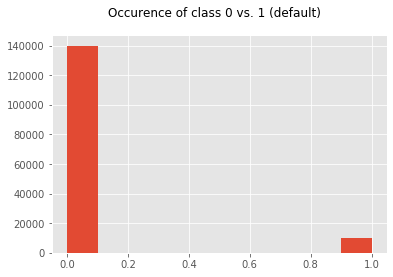

In [ ]:
import pylab as pl

axes = labels.hist()
pl.suptitle("Occurence of class 0 vs. 1 (default)")

print("class \n", labels.value_counts()/len(labels))

Clearly the dataset is very unbalanced. About 6.6% belongs to class 1 :  Person experienced 90 days past due delinquency or worse. This makes the learning process harder as the ML algorithm will find it hard to catch the defaulted people. We have to be very careful in building the model (different approaches for this point will be discussed later).


## Predictors 

### Obsevations

The predictors have differeeent types.

In [ ]:
features.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

Counting missing values for each predictor.

In [ ]:
features.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

This seems reasonable since most people tend to not share their salaries or real number of dependant (considered as sensitive information).

In [ ]:
features.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Clearly the data is not very clean and having age = 0 or 109 is very surprizing. Let us take a closer look at each feature. Age 0 will be ignored and replace by mean of age. 

In [ ]:
train_data.loc[train_data["age"] == 0, "age"] = train_data.age.mean()

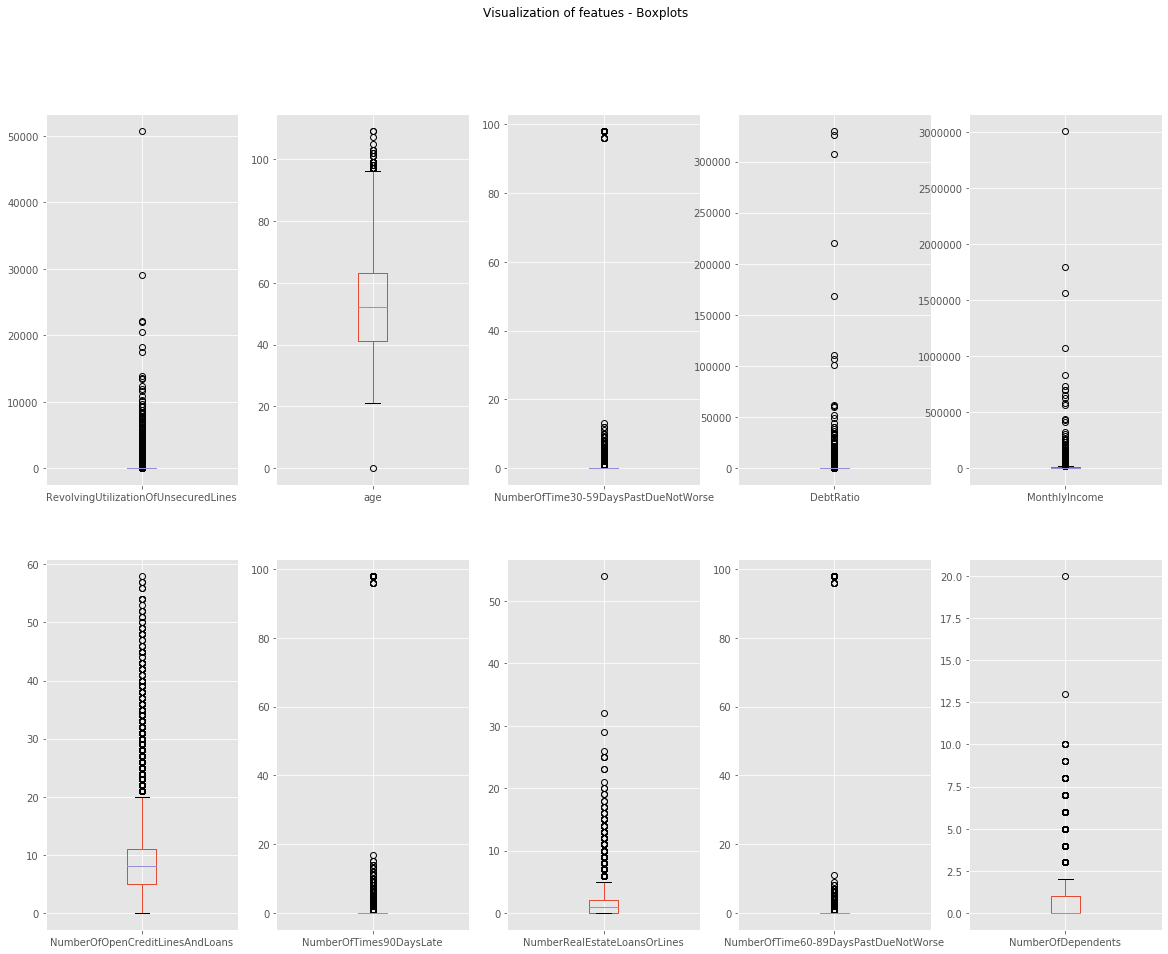

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20, 15))
fig.suptitle("Visualization of featues - Boxplots")

index = 0
for i in range(2):
    for j in range(5):
        features.boxplot(column = features.columns[index], ax = axes[i, j])
        index = index + 1     

**Conclusion**: From the above plot, we can see that all features have some outliers and scaled differently. Using a Machine Leaning algoithm that is based on Euclidien distance (or contribution of features) may not work well (this can be solved by data normalization and outliers cleaning). Another approach is to think about tree-based models that does not requires strong assumptions on the distribution of features (or sclae/type).

An interesting analysis is to see the distribution of classes in each feature.

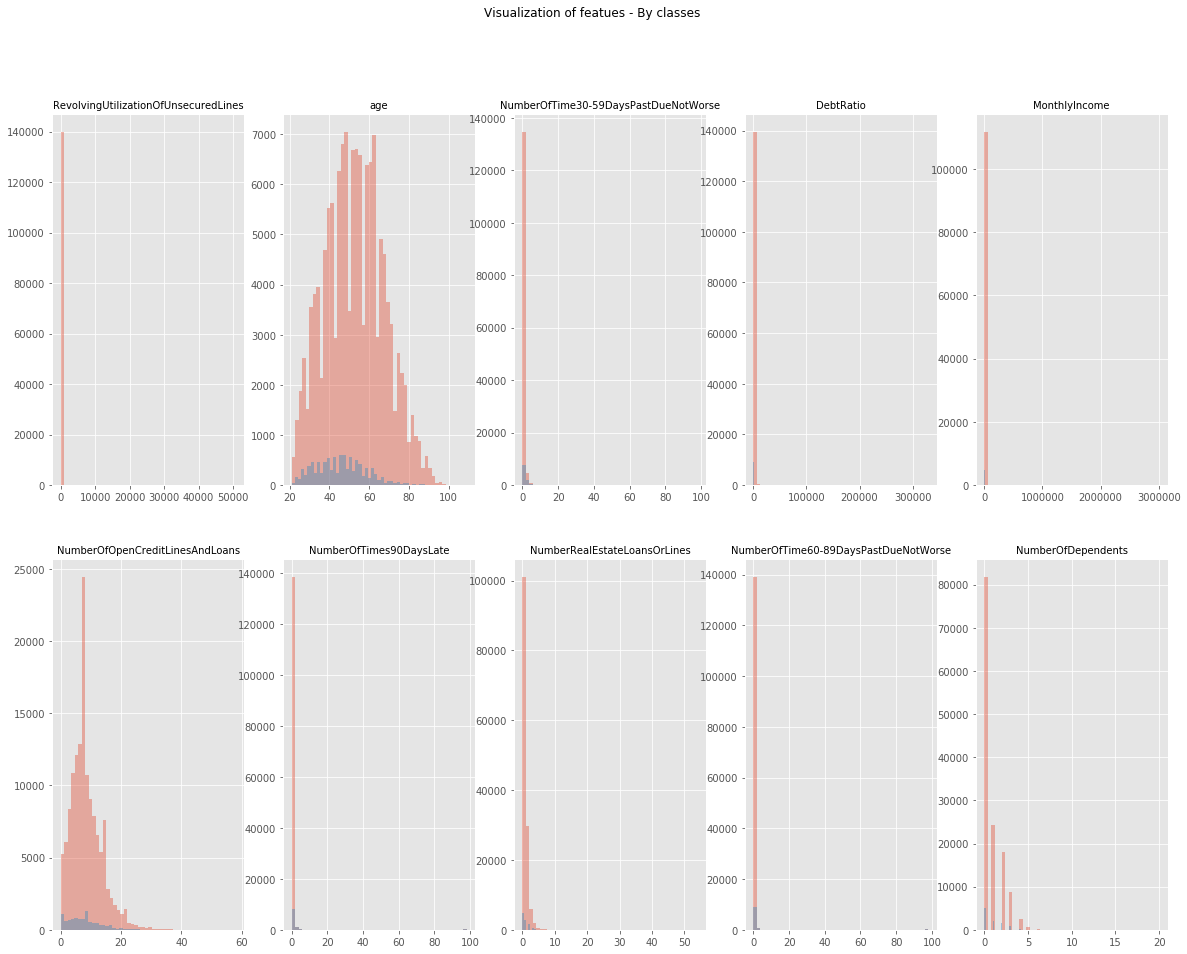

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20, 15))
fig.suptitle("Visualization of featues - By classes")

data = train_data.drop(['Unnamed: 0'], axis = 1).groupby("SeriousDlqin2yrs")

index = 0
for i in range(2):
    for j in range(5):
        data[features.columns[index]].hist(alpha=0.4,figsize=(20, 15), bins = 50, ax = axes[i, j])
        axes[i, j].set_title(features.columns[index], size = 10)
        index = index + 1

### Handling Missing/wong values



In [ ]:
ranges = [0 , 60, 110]

bins=pd.cut(train_data['age'],ranges)

age_income = train_data.drop(['Unnamed: 0'], axis = 1).groupby(bins)['MonthlyIncome'].mean()
print(age_income)

age
(0, 60]      6664.136611
(60, 110]    6686.505991
Name: MonthlyIncome, dtype: float64


- Monthly income: 

Under the assumption that consumers are coming from the same population (coutry/region) we can assume that the monthly income is related to the age and somehow people in some brackets of age will have closer income. 

For simplicity, we will replace missing values for income based on age:

   - Age (18 - 60) : replace Nan with mean of this bracket
   - Above 60 (retired) : replace Nan with mean of this bracket

In [ ]:
# Condition on age brackets 
m1 = (train_data['age'] <= 60)
m2 = (train_data['age'] > 60)


# Then replace each age backets with zero income 
mean1 = train_data.loc[m1,'MonthlyIncome'].mean() 
mean2 = train_data.loc[m2,'MonthlyIncome'].mean()

train_data.loc[m1,'MonthlyIncome'] = train_data.loc[m1,'MonthlyIncome'].fillna(mean1)
train_data.loc[m2,'MonthlyIncome'] = train_data.loc[m2,'MonthlyIncome'].fillna(mean2)

- Nb of dependants: 

We will use the same approach as before. By replacing nb of dependents by backets of age. Let us first analyze the data.

In [ ]:
train_data.NumberOfDependents.value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [ ]:
ranges = [0 , 30,  60, 110]

bins=pd.cut(train_data['age'],ranges)

age_depent = train_data.drop(['Unnamed: 0'], axis = 1).groupby(bins)['NumberOfDependents'].median()
print(age_depent)

age
(0, 30]      0.0
(30, 60]     1.0
(60, 110]    0.0
Name: NumberOfDependents, dtype: float64


In [ ]:
# Condition on age brackets 
m1 = (train_data['age'] <= 30)
m2 = (train_data['age'] <= 60) & (train_data['age'] > 30 )
m3 = (train_data['age'] > 60)


# Then replace each age backets with zero income 
col = 'NumberOfDependents'

median1 = train_data.loc[m1,col].median()
median2 = train_data.loc[m2,col].median()
median3 = train_data.loc[m3,col].median()

train_data.loc[m1,col] = train_data.loc[m1,col].fillna(median1)
train_data.loc[m2,col] = train_data.loc[m2,col].fillna(median2)
train_data.loc[m3,col] = train_data.loc[m3,col].fillna(median3)

Now cleaning is done.

In [ ]:
train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295555,0.421033,353.005076,6.670856e+03,8.452760,0.265973,1.018240,0.240387,0.747047
std,43301.414527,0.249746,249.755371,14.771249,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.104911
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Features understading

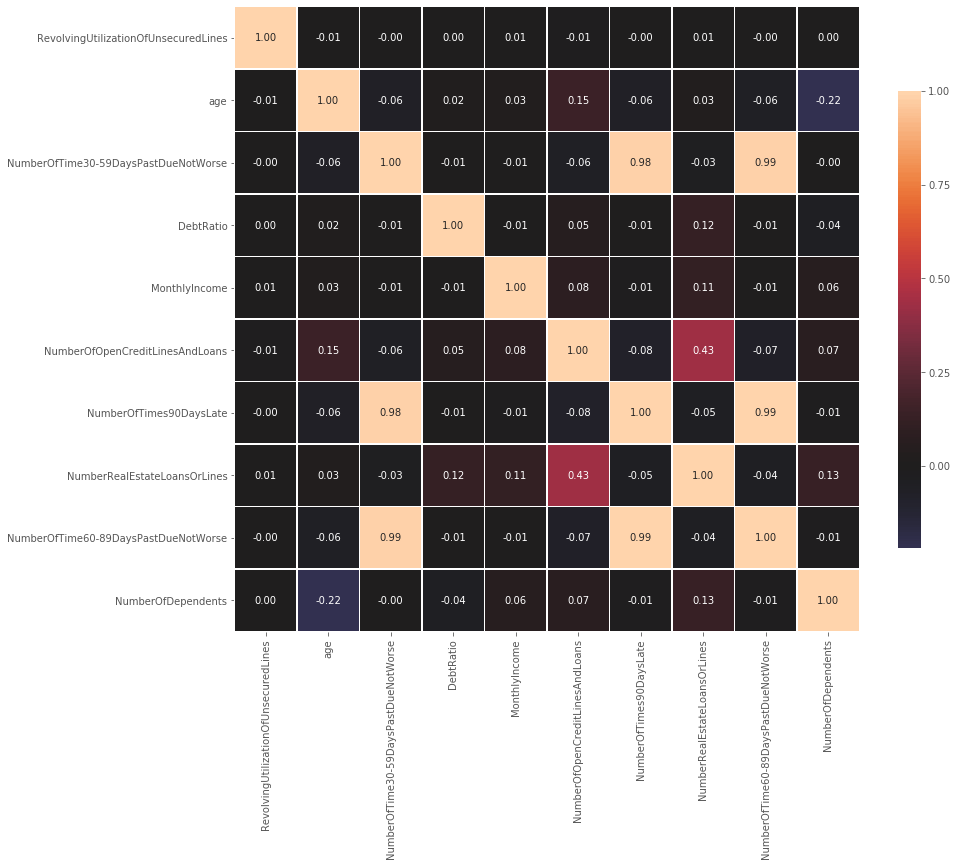

In [ ]:
import seaborn as sn

corr = train_data.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1).corr()
plt.figure(figsize=(14,12))

sn.heatmap(corr, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

**Comments**

NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTime30-59DaysPastDueNotWorse are highly correlated. This is expected as a consumer who aleady have financial issues to pay after 30days is more likely to continue having issues. Having features that represent the same information is not very helpful for ML algorithms, for this reason we will keep only `NumberOfTime30-59DaysPastDueNotWorse` from the above 3 features. To represent a more conservative scenario, we will add a new feature `has_defaulted` which will simply be : 

- 1 : if sum(NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse) is bigger than 1
- 0 : else

In [ ]:
train_data["has_defaulted"] = (train_data["NumberOfTimes90DaysLate"] + 
                                   train_data["NumberOfTime60-89DaysPastDueNotWorse"]+ 
                                   train_data["NumberOfTime30-59DaysPastDueNotWorse"] )

train_data.loc[(train_data["has_defaulted"] >= 1), "has_defaulted"] = 1
train_data.drop(['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'Unnamed: 0' ], 
                inplace = True, 
                axis = 1)

More feature engineering can be conducted (age brackets, total nb of loans, ...). For simplicty of our appoach we will ommit these details here. 

# Predictive Model

## Data

From previous section, we have constrructed the following cleaned dataset. 


In [ ]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,has_defaulted
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295555,0.421033,353.005076,6.670856e+03,8.452760,1.018240,0.747047,0.202420
std,0.249746,249.755371,14.771249,4.192781,2037.818523,1.288045e+04,5.145951,1.129771,1.104911,0.401805
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,2.000000,1.000000,0.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,54.000000,20.000000,1.000000


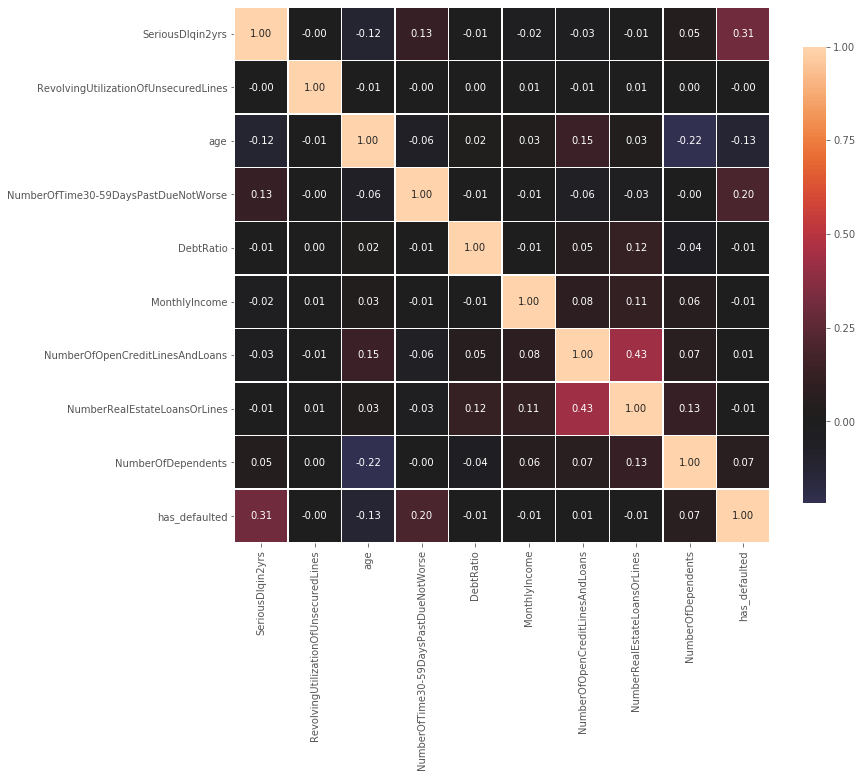

In [ ]:
corr = train_data.corr()
plt.figure(figsize=(12,12))
sn.heatmap(corr, vmax=1.0, center=0, fmt='.2f',square=True, 
           linewidths=.5, annot=True, cbar_kws={"shrink": .70})

Before moving forward with building an ML algorithm, let us load the test dataset and do the exact same transformations on it. One should not that for feature cleaning (where we replaced by mean/median), there are two approaches : 

- Use values from training data to clean test data: this is usefull when we want to deploy our model in live environement and we don't have test data to compute mean/median and replace Nan. Also in the case of time series we should never use values from the future in the sense that for testing dataset, we have to use values from the past to replace Nan. 

- Use values from test dataset to clean test dataset: this can be useful in the case of off-line machine leaning where we already have the whole dataset on which we will perform predictions. 

In [ ]:
!wget "http://imadelhanafi.com/data/credit_score/cs-test.csv"

--2019-09-01 09:33:04--  http://imadelhanafi.com/data/credit_score/cs-test.csv
Resolving imadelhanafi.com (imadelhanafi.com)... 104.28.29.48, 104.28.28.48, 2606:4700:30::681c:1c30, ...
Connecting to imadelhanafi.com (imadelhanafi.com)|104.28.29.48|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://imadelhanafi.com/data/credit_score/cs-test.csv [following]
--2019-09-01 09:33:04--  https://imadelhanafi.com/data/credit_score/cs-test.csv
Connecting to imadelhanafi.com (imadelhanafi.com)|104.28.29.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘cs-test.csv.1’

cs-test.csv.1           [ <=>                ]   4.75M  27.6MB/s    in 0.2s    

2019-09-01 09:33:05 (27.6 MB/s) - ‘cs-test.csv.1’ saved [4983329]



In [ ]:
test_data = pd.read_csv("cs-test.csv")
test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [ ]:
# Condition on age brackets 
m1 = (test_data['age'] <= 60)
m2 = (test_data['age'] > 60)


# Then replace each age backets with zero income 
mean1 = test_data.loc[m1,'MonthlyIncome'].mean() 
mean2 = test_data.loc[m2,'MonthlyIncome'].mean()

test_data.loc[m1,'MonthlyIncome'] = test_data.loc[m1,'MonthlyIncome'].fillna(mean1)
test_data.loc[m2,'MonthlyIncome'] = test_data.loc[m2,'MonthlyIncome'].fillna(mean2)



# Condition on age brackets 
m1 = (test_data['age'] <= 30)
m2 = (test_data['age'] <= 60) & (test_data['age'] > 30 )
m3 = (test_data['age'] > 60)


# Then replace each age backets with zero income 
col = 'NumberOfDependents'

median1 = test_data.loc[m1,col].median()
median2 = test_data.loc[m2,col].median()
median3 = test_data.loc[m3,col].median()

test_data.loc[m1,col] = test_data.loc[m1,col].fillna(median1)
test_data.loc[m2,col] = test_data.loc[m2,col].fillna(median2)
test_data.loc[m3,col] = test_data.loc[m3,col].fillna(median3)

# Add has_defaulted feature
test_data["has_defaulted"] = (test_data["NumberOfTimes90DaysLate"] + 
                              test_data["NumberOfTime60-89DaysPastDueNotWorse"]+ 
                              test_data["NumberOfTime30-59DaysPastDueNotWorse"] )

test_data.loc[(test_data["has_defaulted"] >= 1), "has_defaulted"] = 1
test_data.drop(['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'Unnamed: 0' ], 
                inplace = True, 
                axis = 1)

In [ ]:
test_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberRealEstateLoansOrLines                 0
NumberOfDependents                           0
has_defaulted                                0
dtype: int64

Now we should not touch this testing dataset until we build the ML model.

## Modeling

Let us first split data into X (features) and (y) labels and create a validation dataset. 

In [ ]:
X = train_data.drop("SeriousDlqin2yrs", axis=1).copy()
y = train_data.SeriousDlqin2yrs
X.shape, y.shape

((150000, 9), (150000,))

In [ ]:
# Split dataset into training and validation. 
from sklearn.model_selection import train_test_split, cross_val_predict

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=666)

As discussed ealier, due to the complexity of data (wide range) I think that a tee-based model is more suitable for this problem. Also, for performance measure, in the kaggle it is suggested to use AUC (aerea under the curve). Let us remind some basic definitions. 
Let us recall the Positive/Negative vocabulary. 

![alt text](http://imadelhanafi.com/data/draft/fp.png)



The ROC plots shows the true positive rate (TR_rate) on the y-axis versus the false positive rate (FP_rate) on the x-axis.

![alt text](https://miro.medium.com/max/2404/1*Uh9YUp632ktSd75bZDeB0Q.png)


We can move along the curve by adjusting our threshold for classifying a positive case. Threshold = 1.0, we have no positive predictions (TPR = FPR = 0) and we will be in the left corner of the plot, as we dicrease the threshold, we have more and more positive predctions. At a threshold of 0.0 we identify all data as positive we'll be in the upper right corner of the ROC curve (TPR = FPR = 1.0).

AUC (Aerea under the curve) is a metric between 0 and 1 (random predictions has AUC=0.5). The higher AUC, the better the classifier.


In [ ]:
# Utils to plot roc curve
from sklearn.metrics import roc_curve, roc_auc_score, classification_report


def plot_roc_curve(fp, tp, label=None):
    plt.figure(figsize=(10,8))
    plt.plot(fp, tp, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("FP Rate")
    plt.ylabel("TP rate")

In [ ]:
%%time

# Fit the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=666,n_estimators=300, max_depth=5, class_weight="balanced")
model.fit(X_train,y_train)

CPU times: user 20 s, sys: 15.8 ms, total: 20 s
Wall time: 20.1 s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=666, verbose=0, warm_start=False)

AUC Score 0.8561261380621197
              precision    recall  f1-score   support

           0       0.98      0.76      0.86    105032
           1       0.19      0.79      0.31      7468

   micro avg       0.77      0.77      0.77    112500
   macro avg       0.59      0.78      0.58    112500
weighted avg       0.93      0.77      0.82    112500



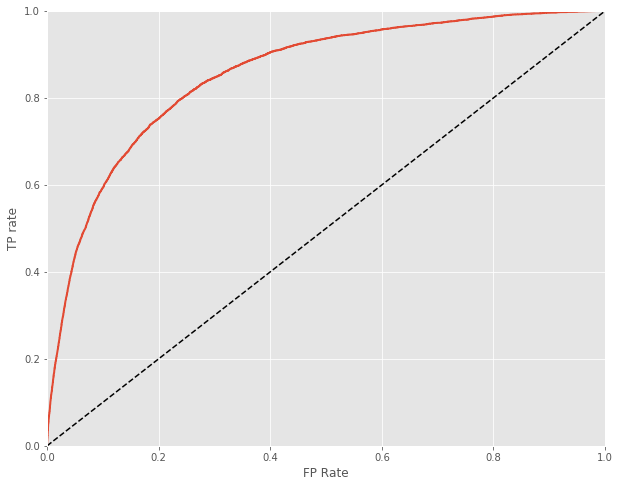

In [ ]:
# Score/Metrics on training dataset
y_scores_proba = model.predict_proba(X_train)
y_scores = y_scores_proba[:,1]

fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)

print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

y_predict_class =  y_scores_proba.argmax(axis = 1)
print(classification_report(y_train,y_predict_class))

- On validation dataset

AUC Score 0.8527304031445564
              precision    recall  f1-score   support

           0       0.98      0.76      0.86    105032
           1       0.19      0.79      0.31      7468

   micro avg       0.77      0.77      0.77    112500
   macro avg       0.59      0.78      0.58    112500
weighted avg       0.93      0.77      0.82    112500



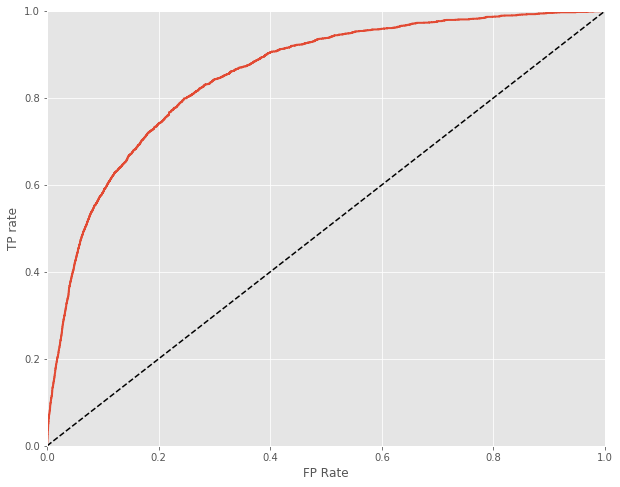

In [ ]:
# Metrics on validation dataset
y_val_proba = model.predict_proba(X_val)
y_val_s = y_val_proba[:,1]

fpr, tpr, thresh = roc_curve(y_val, y_val_s)
plot_roc_curve(fpr,tpr)

print("AUC Score {}".format(roc_auc_score(y_val, y_val_s)))

y_predict_class =  y_scores_proba.argmax(axis = 1)
print(classification_report(y_train,y_predict_class))

### Features importance

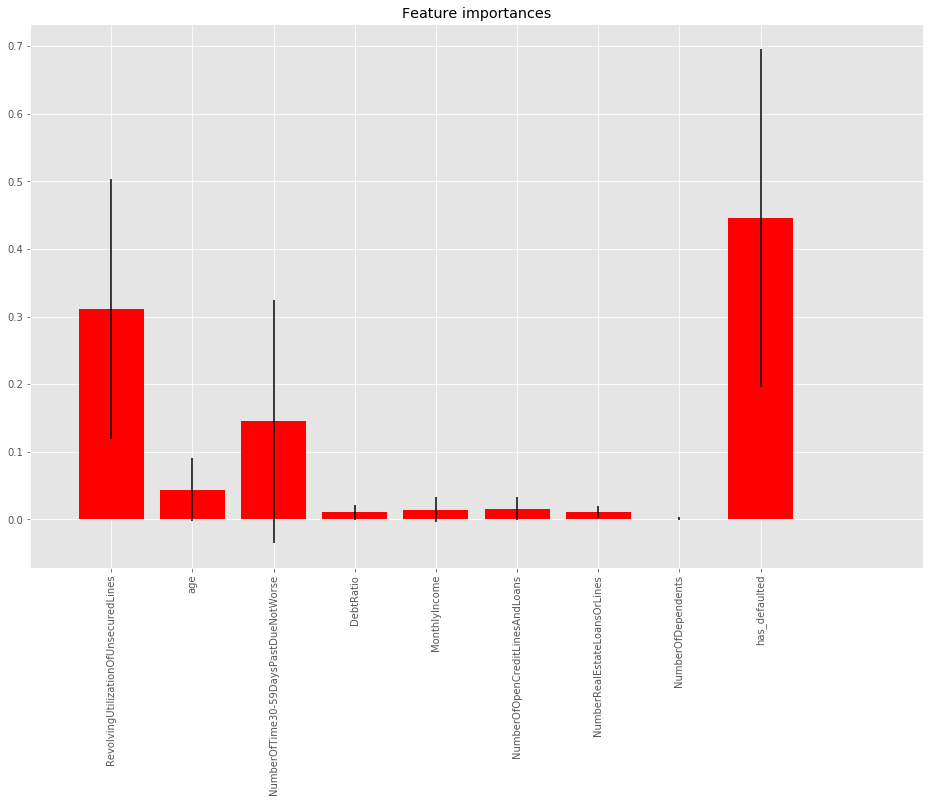

In [ ]:
def plot_feature_importances(model):
    plt.figure(figsize=(16,10))
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances,
           color="r", yerr=std, align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
    plt.xlim([-1, 10])
    plt.show()

plot_feature_importances(model)

### Finetuning the model

Now we have a build a baseline with an acceptable performance, we can move forward and try to do some parameter search. For this we will use cross-validation method. If the space where we search parameters is big, then other hyper-parameter tuning methods are more suitable (Bayesian Optimization or random search).

![alt text](http://imadelhanafi.com/data/draft/val.png)



In [ ]:
from sklearn.model_selection import GridSearchCV

### Parameter space
# ATTENTION: Run only on large CPU machines or reduce param_grid 

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 20, 50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
grid_Search = GridSearchCV(rf, 
                         param_grid, 
                         cv = 5,
                         n_jobs = -1,
                         verbose = -1,
                         scoring = 'roc_auc')

# Fit the random search model
grid_Search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1672 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 80.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 20, 50], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=-1)

In [ ]:
print("Best parameters set found on development set:")
print(grid_Search.best_params_)


# print("Grid AUC scores on development set:")
# means = grid_Search.cv_results_["mean_test_score"]
# stds = grid_Search.cv_results_["std_test_score"]
# for mean, std, params in zip(means, stds, grid_Search.cv_results_["params"]):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 1000}


In [ ]:
# Validation dataset scores
y_val_proba = grid_Search.predict_proba(X_val)
y_val_s = y_val_proba[:,1]

print("AUC Score {}".format(roc_auc_score(y_val, y_val_s)))
print("Detailed classification report:")
print("The scores are computed on the validation set.")

y_pred = y_val_proba.argmax(axis = 1)

print(classification_report(y_val, y_pred))

AUC Score 0.8593272783684559
Detailed classification report:
The scores are computed on the validation set.
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     34942
           1       0.58      0.08      0.14      2558

   micro avg       0.93      0.93      0.93     37500
   macro avg       0.76      0.54      0.55     37500
weighted avg       0.91      0.93      0.91     37500



In [ ]:
## Generate submission

Now we have found the best params, let us re-train the model on the whole dataset, then generate predictions for test dataset. 

In [ ]:
grid_Search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [ ]:
# Re-train on whole dataset : X, y

best_rf = RandomForestClassifier(n_jobs=-1, **grid_Search.best_params_)

best_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
X_test = test_data.drop("SeriousDlqin2yrs", axis=1).copy()

submission_proba = best_rf.predict_proba(X_test)
submission_scores = submission_proba[:,1] #Positive Class

In [ ]:
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('submission_kaggle_best.csv', index=False)

Here is the final score on Kaggle

![alt text](http://imadelhanafi.com/data/draft/score.png)


# Conclusion

In the previous sections, we have build a machine learning model to predict if a consumer is borrower will face financial distress in the next two years. 

With a tree-based model we obtained a reasonable score (AUC) but there exists many points to improve our results (performance of predictions). Hereunder I will list a non-exaustive list of improvements that we can think about :

- Feature engineering.
- Make production ready code for predictions (dockerize) as an API.
- Finetune other algorithms and do model selection.
- Solve the issue of unbalanced classes (resampling or class_weightening) https://github.com/scikit-learn-contrib/imbalanced-learn 
- Ensembling/stacking of different ML in order to build a better model.
- Use some Bayesian approaches to build a level of confidence on predictions.
